In [18]:
import torch
import torch.nn as nn
import torch.utils.data as data_utils
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np


In [19]:
# A simple 2 layer neural network
class NNModel(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(NNModel, self).__init__()

    self.fc1 = nn.Linear(input_dim, hidden_dim)
    self.sigmoid = nn.Sigmoid()
    self.fc2 = nn.Linear(hidden_dim, output_dim)
  
  def forward(self, x):
    out = self.fc1(x)
    out = self.sigmoid(out)
    out = self.fc2(out)
    return out

loss = nn.MSELoss()

In [20]:
def load_tensors(features, labels):
  features_tensor = torch.Tensor(features)
  labels_tensor = torch.Tensor(labels)
  return data_utils.TensorDataset(features_tensor, labels_tensor)

def train_loader(features, labels, batch_size):
  tensor_dataset = load_tensors(features, labels)
  loader = data_utils.DataLoader(tensor_dataset, batch_size=batch_size, shuffle=True)
  return loader

In [21]:
#Load positional encoded data
X_positional_test = np.load('../../training_sets/Xtest_positional_set_data.npy', allow_pickle=True)
X_positional_train = np.load('../../training_sets/Xtrain_positional_set_data.npy', allow_pickle=True)
X_positional_val = np.load('../../training_sets/Xvalidate_positional_set_data.npy', allow_pickle=True)

Y_positional_test = np.load('../../training_sets/Ytest_positional_set_data.npy', allow_pickle=True)
Y_positional_train = np.load('../../training_sets/Ytrain_positional_set_data.npy', allow_pickle=True)
Y_positional_val = np.load('../../training_sets/Yvalidate_positional_set_data.npy', allow_pickle=True)

In [22]:
def train_model(model, df_features=X_positional_train, df_labels=Y_positional_train, n_iters=10000, batch_size=50, learning_rate=0.01):
    dataframe_len=len(df_features)
    loader = train_loader(features=df_features, labels=df_labels, batch_size=batch_size)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    num_epochs = int(n_iters / (dataframe_len / batch_size))
    running_losses = []
    running_accuracy = []
    running_epoch = []
    
    for epoch in range(num_epochs):
        for i,(x_train,y_train) in enumerate(loader):
            y_pred = model(x_train)
            cost = loss(y_pred,y_train)
            optimizer.zero_grad()
            cost.backward()
            optimizer.step()
        running_losses.append(cost)
        running_epoch.append(epoch)
        if epoch % 500 == 0 and epoch != 0:
                print('epoch: ' + str(epoch) + ' cost: ' + str(cost))
    with torch.no_grad():
        plt.subplot(122)
        plt.plot(running_epoch, running_losses)
        plt.title('Running Losses vs Epoch')
        plt.show()
    return model
  


First Model
epoch: 500 cost: tensor(53996.7461, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(69835.4922, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(40246.5547, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(105407.0625, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(23041.0996, grad_fn=<MseLossBackward0>)


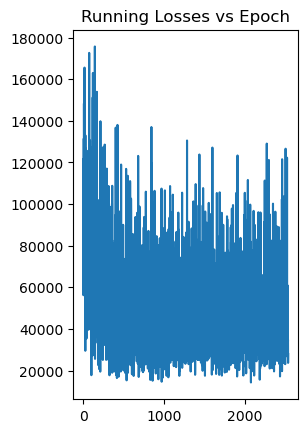

Second Model
epoch: 500 cost: tensor(65851.1641, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(102214.9844, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(23362.1055, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(23071.3379, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(97085.5781, grad_fn=<MseLossBackward0>)
epoch: 3000 cost: tensor(87323.3594, grad_fn=<MseLossBackward0>)
epoch: 3500 cost: tensor(75399.3906, grad_fn=<MseLossBackward0>)


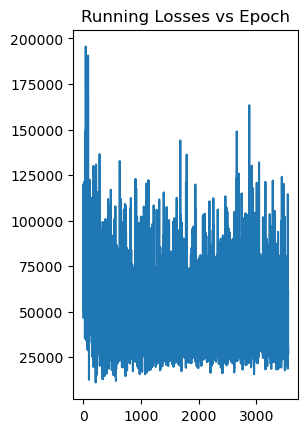

Third Model
epoch: 500 cost: tensor(16379.1836, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(48378.4883, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(41618.5273, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(37627.0547, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(24602.2734, grad_fn=<MseLossBackward0>)
epoch: 3000 cost: tensor(30806.2246, grad_fn=<MseLossBackward0>)
epoch: 3500 cost: tensor(61064.1367, grad_fn=<MseLossBackward0>)


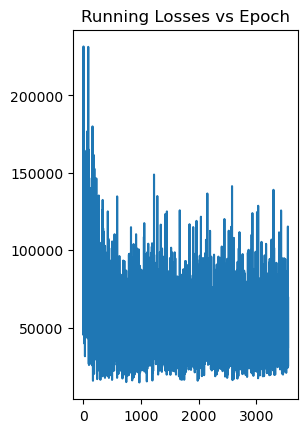

Fourth Model
epoch: 500 cost: tensor(52802.3203, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(47573.4727, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(40729.2383, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(38235.8750, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(70083.8906, grad_fn=<MseLossBackward0>)
epoch: 3000 cost: tensor(47909.8164, grad_fn=<MseLossBackward0>)
epoch: 3500 cost: tensor(22015.5352, grad_fn=<MseLossBackward0>)
epoch: 4000 cost: tensor(59860.7734, grad_fn=<MseLossBackward0>)
epoch: 4500 cost: tensor(62591.7695, grad_fn=<MseLossBackward0>)
epoch: 5000 cost: tensor(43399.1680, grad_fn=<MseLossBackward0>)


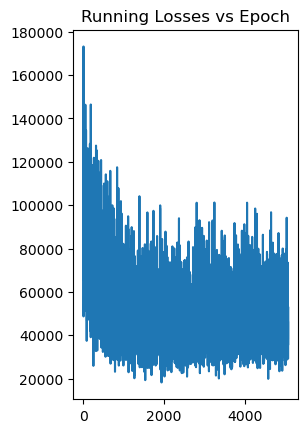

Fifth Model
epoch: 500 cost: tensor(25813.5977, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(40838.2227, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(47684.4062, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(56511.0195, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(64998.6211, grad_fn=<MseLossBackward0>)


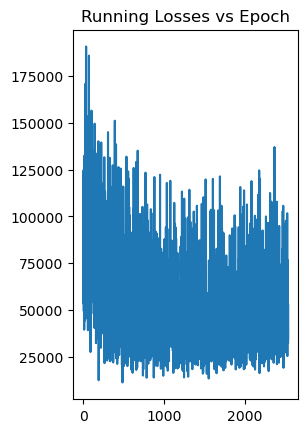

In [23]:
#positional Encoding
print("First Model")
first_model = NNModel(input_dim=4008, hidden_dim=10, output_dim=1)
first_model = train_model(model=first_model, n_iters=50000, batch_size=50, learning_rate=1e-5)
print("Second Model")
second_model = NNModel(input_dim=4008, hidden_dim=10, output_dim=1)
second_model = train_model(model=second_model, n_iters=70000, batch_size=50, learning_rate=1.1e-5)
print("Third Model")
third_model = NNModel(input_dim=4008, hidden_dim=10, output_dim=1)
third_model = train_model(model=third_model, n_iters=70000, batch_size=50, learning_rate=0.9e-5)
print("Fourth Model")
fourth_model = NNModel(input_dim=4008, hidden_dim=10, output_dim=1)
fourth_model = train_model(model=fourth_model, n_iters=50000, batch_size=100, learning_rate=0.8e-5)
print("Fifth Model")
fifth_model = NNModel(input_dim=4008, hidden_dim=10, output_dim=1)
fifth_model = train_model(model=fifth_model, n_iters=50000, batch_size=50, learning_rate=0.7e-5)

In [24]:
# Let's use the validation sets on our models
tensor_positional_X_val = torch.Tensor(X_positional_val)
tensor_positional_Y_val = torch.Tensor(Y_positional_val)

y_pred = first_model(tensor_positional_X_val)
cost = loss(y_pred, tensor_positional_Y_val)
print("Cost first model: " + str(cost))

y_pred = second_model(tensor_positional_X_val)
cost = loss(y_pred, tensor_positional_Y_val)
print("Cost second model: " + str(cost))

y_pred = third_model(tensor_positional_X_val)
cost = loss(y_pred, tensor_positional_Y_val)
print("Cost third model: " + str(cost))

y_pred = fourth_model(tensor_positional_X_val)
cost = loss(y_pred, tensor_positional_Y_val)
print("Cost fourth model: " + str(cost))

y_pred = fifth_model(tensor_positional_X_val)
cost = loss(y_pred, tensor_positional_Y_val)
print("Cost fifth model: " + str(cost))

Cost first model: tensor(35550.8867, grad_fn=<MseLossBackward0>)
Cost second model: tensor(35556.7734, grad_fn=<MseLossBackward0>)
Cost third model: tensor(35555.7461, grad_fn=<MseLossBackward0>)
Cost fourth model: tensor(35500.8945, grad_fn=<MseLossBackward0>)
Cost fifth model: tensor(35331.9180, grad_fn=<MseLossBackward0>)


In [43]:
# Testing on our fourth model
tensor_positional_X_test = torch.Tensor(X_positional_test)
tensor_positional_Y_test = torch.Tensor(Y_positional_test)

y_pred = fourth_model(tensor_positional_X_test)
cost = loss(y_pred, tensor_positional_Y_test)
print("Test fourth model: " + str(cost))

Test fourth model: tensor(36828.5078, grad_fn=<MseLossBackward0>)


In [30]:
class DNNModel(nn.Module):
    def __init__(self, input_dim=4008, output_dim=1):
        super(DNNModel, self).__init__()
        
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        inter_layer_size1 = 256
        self.fc1 = nn.Linear(input_dim, inter_layer_size1)
        inter_layer_size2 = int((inter_layer_size1 + output_dim) / 2)
        self.fc2 = nn.Linear(inter_layer_size1, inter_layer_size2)
        inter_layer_size3 = int((inter_layer_size2 + output_dim) / 2)
        self.fc3 = nn.Linear(inter_layer_size2, inter_layer_size3)
        self.fc_last = nn.Linear(inter_layer_size3, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        
        out = self.fc2(out)
        out = self.relu(out)
        
        out = self.fc3(out)
        out = self.relu(out)
        
        out = self.fc_last(out)
        return out

First Model
epoch: 500 cost: tensor(99942.5312, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(52337.8477, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(55846.1133, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(47138.0391, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(48480.6641, grad_fn=<MseLossBackward0>)


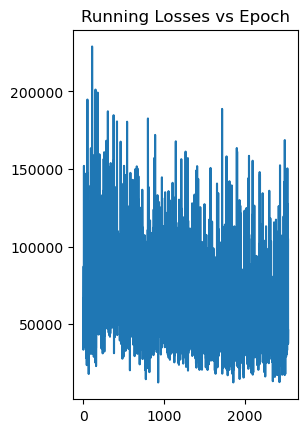

Second Model
epoch: 500 cost: tensor(20688.8945, grad_fn=<MseLossBackward0>)


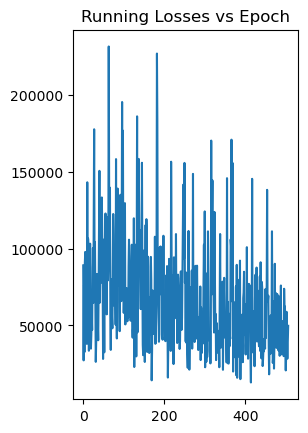

Third Model
epoch: 500 cost: tensor(22200.1660, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(41953.1875, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(48316.3203, grad_fn=<MseLossBackward0>)


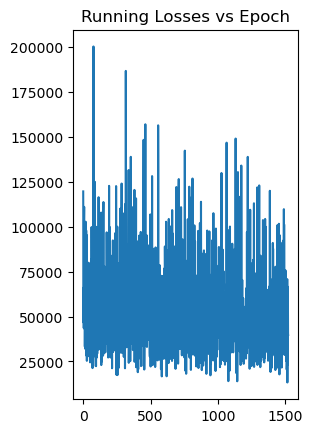

Fourth Model
epoch: 500 cost: tensor(101798.8984, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(44848.5586, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(69518.4219, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(49794.9570, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(49871.0586, grad_fn=<MseLossBackward0>)
epoch: 3000 cost: tensor(33040.6719, grad_fn=<MseLossBackward0>)
epoch: 3500 cost: tensor(50558.0859, grad_fn=<MseLossBackward0>)
epoch: 4000 cost: tensor(28325.9863, grad_fn=<MseLossBackward0>)
epoch: 4500 cost: tensor(33089.3203, grad_fn=<MseLossBackward0>)
epoch: 5000 cost: tensor(81807.3047, grad_fn=<MseLossBackward0>)


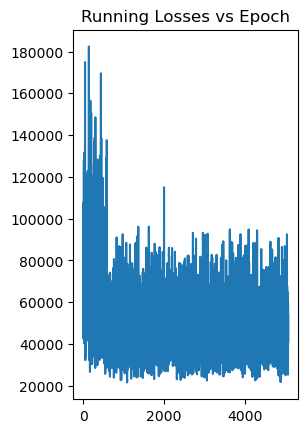

Fifth Model
epoch: 500 cost: tensor(70017.2344, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(62333.6289, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(20207.4668, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(27048.1875, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(57375.5156, grad_fn=<MseLossBackward0>)


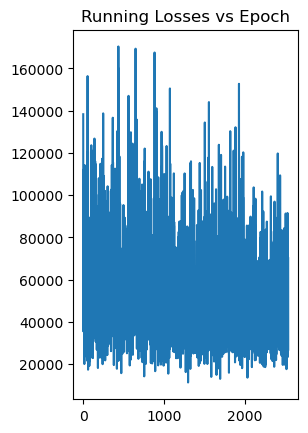

In [31]:
#positional Encoding
print("First Model")
first_model = DNNModel(input_dim=4008, output_dim=1)
first_model = train_model(model=first_model, n_iters=50000, batch_size=50, learning_rate=1e-5)
print("Second Model")
second_model = DNNModel(input_dim=4008, output_dim=1)
second_model = train_model(model=second_model, n_iters=10000, batch_size=50, learning_rate=0.9e-5)
print("Third Model")
third_model = DNNModel(input_dim=4008, output_dim=1)
third_model = train_model(model=third_model, n_iters=30000, batch_size=50, learning_rate=0.8e-5)
print("Fourth Model")
fourth_model = DNNModel(input_dim=4008, output_dim=1)
fourth_model = train_model(model=fourth_model, n_iters=50000, batch_size=100, learning_rate=1.1e-5)
print("Fifth Model")
fifth_model = DNNModel(input_dim=4008, output_dim=1)
fifth_model = train_model(model=fifth_model, n_iters=50000, batch_size=50, learning_rate=0.8e-5)

In [32]:
# Let's use the validation sets on our models
tensor_positional_X_val = torch.Tensor(X_positional_val)
tensor_positional_Y_val = torch.Tensor(Y_positional_val)

y_pred = first_model(tensor_positional_X_val)
cost = loss(y_pred, tensor_positional_Y_val)
print("Cost first model: " + str(cost))

y_pred = second_model(tensor_positional_X_val)
cost = loss(y_pred, tensor_positional_Y_val)
print("Cost second model: " + str(cost))

y_pred = third_model(tensor_positional_X_val)
cost = loss(y_pred, tensor_positional_Y_val)
print("Cost third model: " + str(cost))

y_pred = fourth_model(tensor_positional_X_val)
cost = loss(y_pred, tensor_positional_Y_val)
print("Cost fourth model: " + str(cost))

y_pred = fifth_model(tensor_positional_X_val)
cost = loss(y_pred, tensor_positional_Y_val)
print("Cost fifth model: " + str(cost))

Cost first model: tensor(36030.8047, grad_fn=<MseLossBackward0>)
Cost second model: tensor(42165.7422, grad_fn=<MseLossBackward0>)
Cost third model: tensor(35988.9805, grad_fn=<MseLossBackward0>)
Cost fourth model: tensor(35646.5430, grad_fn=<MseLossBackward0>)
Cost fifth model: tensor(35573.2500, grad_fn=<MseLossBackward0>)


In [33]:
# Testing on our fifth model
y_pred = fifth_model(tensor_positional_X_test)
cost = loss(y_pred, tensor_positional_Y_test)
print("Test fifth model: " + str(cost))

Test fifth model: tensor(34791.3828, grad_fn=<MseLossBackward0>)


In [36]:
class DropoutModel(nn.Module):
    def __init__(self, input_dim=4008, output_dim=1):
        super(DropoutModel, self).__init__()
        
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        inter_layer_size1 = 256
        self.fc1 = nn.Linear(input_dim, inter_layer_size1)
        inter_layer_size2 = int((inter_layer_size1 + output_dim) / 2)
        self.fc2 = nn.Linear(inter_layer_size1, inter_layer_size2)
        inter_layer_size3 = int((inter_layer_size2 + output_dim) / 2)
        self.fc3 = nn.Linear(inter_layer_size2, inter_layer_size3)
        self.fc_last = nn.Linear(inter_layer_size3, output_dim)
    
    def forward(self, x):
        out = self.dropout(x)
        out = self.fc1(out)
        out = self.relu(out)
        
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.relu(out)
        
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.relu(out)
        
        out = self.dropout(out)
        out = self.fc_last(out)
        return out

First Model
epoch: 500 cost: tensor(50328.7070, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(46638.0742, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(40440.1094, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(60905.5938, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(25225.1094, grad_fn=<MseLossBackward0>)


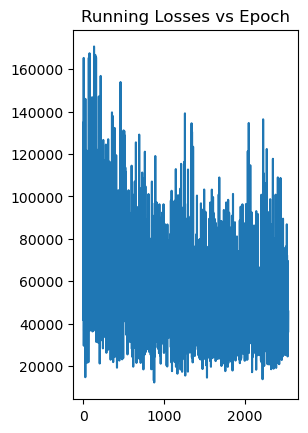

Second Model
epoch: 500 cost: tensor(68919.1172, grad_fn=<MseLossBackward0>)


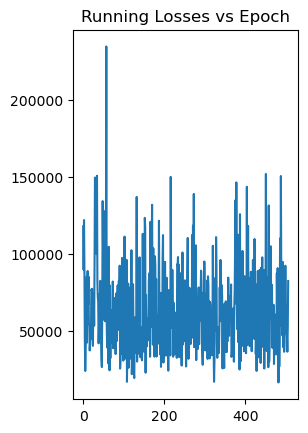

Third Model
epoch: 500 cost: tensor(35626.1172, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(115360.8125, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(34632.3789, grad_fn=<MseLossBackward0>)


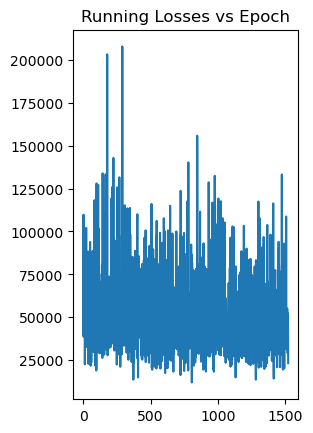

Fourth Model
epoch: 500 cost: tensor(45576.1484, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(42323.6094, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(56950.9766, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(39779.3086, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(48969.7617, grad_fn=<MseLossBackward0>)
epoch: 3000 cost: tensor(37328.3906, grad_fn=<MseLossBackward0>)
epoch: 3500 cost: tensor(64899.3164, grad_fn=<MseLossBackward0>)
epoch: 4000 cost: tensor(50333.5039, grad_fn=<MseLossBackward0>)
epoch: 4500 cost: tensor(50084.3047, grad_fn=<MseLossBackward0>)
epoch: 5000 cost: tensor(63163.0039, grad_fn=<MseLossBackward0>)


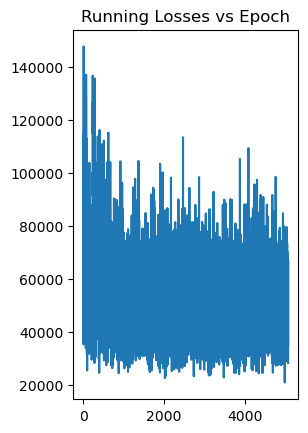

Fifth Model
epoch: 500 cost: tensor(75289.5547, grad_fn=<MseLossBackward0>)
epoch: 1000 cost: tensor(21783.4277, grad_fn=<MseLossBackward0>)
epoch: 1500 cost: tensor(37865.1875, grad_fn=<MseLossBackward0>)
epoch: 2000 cost: tensor(39653.7695, grad_fn=<MseLossBackward0>)
epoch: 2500 cost: tensor(43526.5391, grad_fn=<MseLossBackward0>)


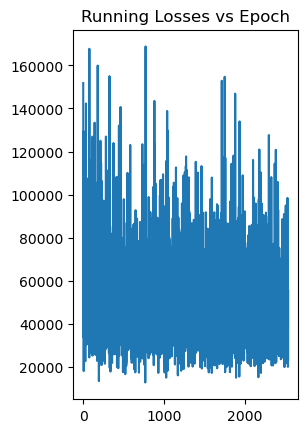

In [37]:
#positional Encoding
print("First Model")
first_model = DropoutModel(input_dim=4008, output_dim=1)
first_model = train_model(model=first_model, n_iters=50000, batch_size=50, learning_rate=1e-5)
print("Second Model")
second_model = DropoutModel(input_dim=4008, output_dim=1)
second_model = train_model(model=second_model, n_iters=10000, batch_size=50, learning_rate=0.9e-5)
print("Third Model")
third_model = DropoutModel(input_dim=4008, output_dim=1)
third_model = train_model(model=third_model, n_iters=30000, batch_size=50, learning_rate=0.8e-5)
print("Fourth Model")
fourth_model = DropoutModel(input_dim=4008, output_dim=1)
fourth_model = train_model(model=fourth_model, n_iters=50000, batch_size=100, learning_rate=1.1e-5)
print("Fifth Model")
fifth_model = DropoutModel(input_dim=4008, output_dim=1)
fifth_model = train_model(model=fifth_model, n_iters=50000, batch_size=50, learning_rate=0.8e-5)

In [38]:
# Let's use the validation sets on our models
tensor_positional_X_val = torch.Tensor(X_positional_val)
tensor_positional_Y_val = torch.Tensor(Y_positional_val)

y_pred = first_model(tensor_positional_X_val)
cost = loss(y_pred, tensor_positional_Y_val)
print("Cost first model: " + str(cost))

y_pred = second_model(tensor_positional_X_val)
cost = loss(y_pred, tensor_positional_Y_val)
print("Cost second model: " + str(cost))

y_pred = third_model(tensor_positional_X_val)
cost = loss(y_pred, tensor_positional_Y_val)
print("Cost third model: " + str(cost))

y_pred = fourth_model(tensor_positional_X_val)
cost = loss(y_pred, tensor_positional_Y_val)
print("Cost fourth model: " + str(cost))

y_pred = fifth_model(tensor_positional_X_val)
cost = loss(y_pred, tensor_positional_Y_val)
print("Cost fifth model: " + str(cost))

Cost first model: tensor(35877.3398, grad_fn=<MseLossBackward0>)
Cost second model: tensor(40320.0352, grad_fn=<MseLossBackward0>)
Cost third model: tensor(34866.1836, grad_fn=<MseLossBackward0>)
Cost fourth model: tensor(34731.6523, grad_fn=<MseLossBackward0>)
Cost fifth model: tensor(34770.7305, grad_fn=<MseLossBackward0>)


In [39]:
# Testing on our fifth model
y_pred = fifth_model(tensor_positional_X_test)
cost = loss(y_pred, tensor_positional_Y_test)
print("Test fifth model: " + str(cost))

Test fifth model: tensor(37920.9102, grad_fn=<MseLossBackward0>)
